In [1]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/inventory-analysis-case-study")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1


In [ ]:
os.chdir('/home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1')

In [5]:
# Cargar archivos
beg_inv = pd.read_csv('BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')
purchases = pd.read_csv('PurchasesFINAL12312016.csv')
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
purchase_prices = pd.read_csv('2017PurchasePricesDec.csv')

In [6]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [7]:
# Buscando valores vacios en cada tabla
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in invoice_purchases:
Approval    5169
dtype: int64

Missing values in purchases:
Size    3
dtype: int64


In [8]:
# Corregir errores faltantes
cols_to_check = ['Description', 'Size', 'Volume']
for col in cols_to_check:
    purchase_prices = purchase_prices[purchase_prices[col].notna()]

# Corregir errores faltantes
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)

# Handling missing values for invoice_purchases dataset
invoice_purchases['Approval'].fillna('Pending', inplace=True)

# Corregir errores faltantes
purchases = purchases[purchases['Size'].notna()]

datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo missing values in {name}.")

/tmp/ipykernel_6587/2379009924.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  end_inv['City'].fillna('Unknown', inplace=True)
/tmp/ipykernel_6587/2379009924.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try


No missing values in purchase_prices.

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoice_purchases.

No missing values in purchases.

No missing values in sales.


In [9]:
# Agrupar por marca y descripción y resumir el inventario para principios de año
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().reset_index().sort_values(by='onHand', ascending=False)

# Agrupar por marca y descripción y resumir el inventario para final de año
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().reset_index().sort_values(by='onHand', ascending=False)

# Identificar los 5 mejores productos al principio y al final del año
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identificar los 5 productos con peores resultados al principio y al final del año
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 productos al comienzo de año:\n", top_5_beg)
print("\nTop 5 productos al final del año:\n", top_5_end)
print("\nPeores 5 productos al principio del año:\n", bottom_5_beg)
print("\nPeores 5 productos al final del año:\n", bottom_5_end)

Top 5 productos al comienzo de año:
       Brand                 Description  onHand
1748   4261      Capt Morgan Spiced Rum   15499
2635   8068            Absolut 80 Proof   15341
1580   3876           Smirnoff 80 Proof   14829
1389   3545             Ketel One Vodka   14499
2474   6879  Maurice's Mentholated Mint   14180

Top 5 productos al final del año:
       Brand              Description  onHand
1507   3545          Ketel One Vodka   16770
1876   4261   Capt Morgan Spiced Rum   16769
2837   8111        Smirnoff 80 Proof   16242
2817   8068         Absolut 80 Proof   15608
496    1233  Jack Daniels No 7 Black   15047

Peores 5 productos al principio del año:
       Brand                  Description  onHand
3325  13082          Cakebread Chard Rsv       0
4065  17291    Westrey Oracle Vyd Pnt Nr       0
2151   5596  Smirnoff Grand Cosmopolitan       0
2453   6762          Paul Masson Chablis       0
3549  14491  Wachau Federspiel Veltliner       0

Peores 5 productos al final del

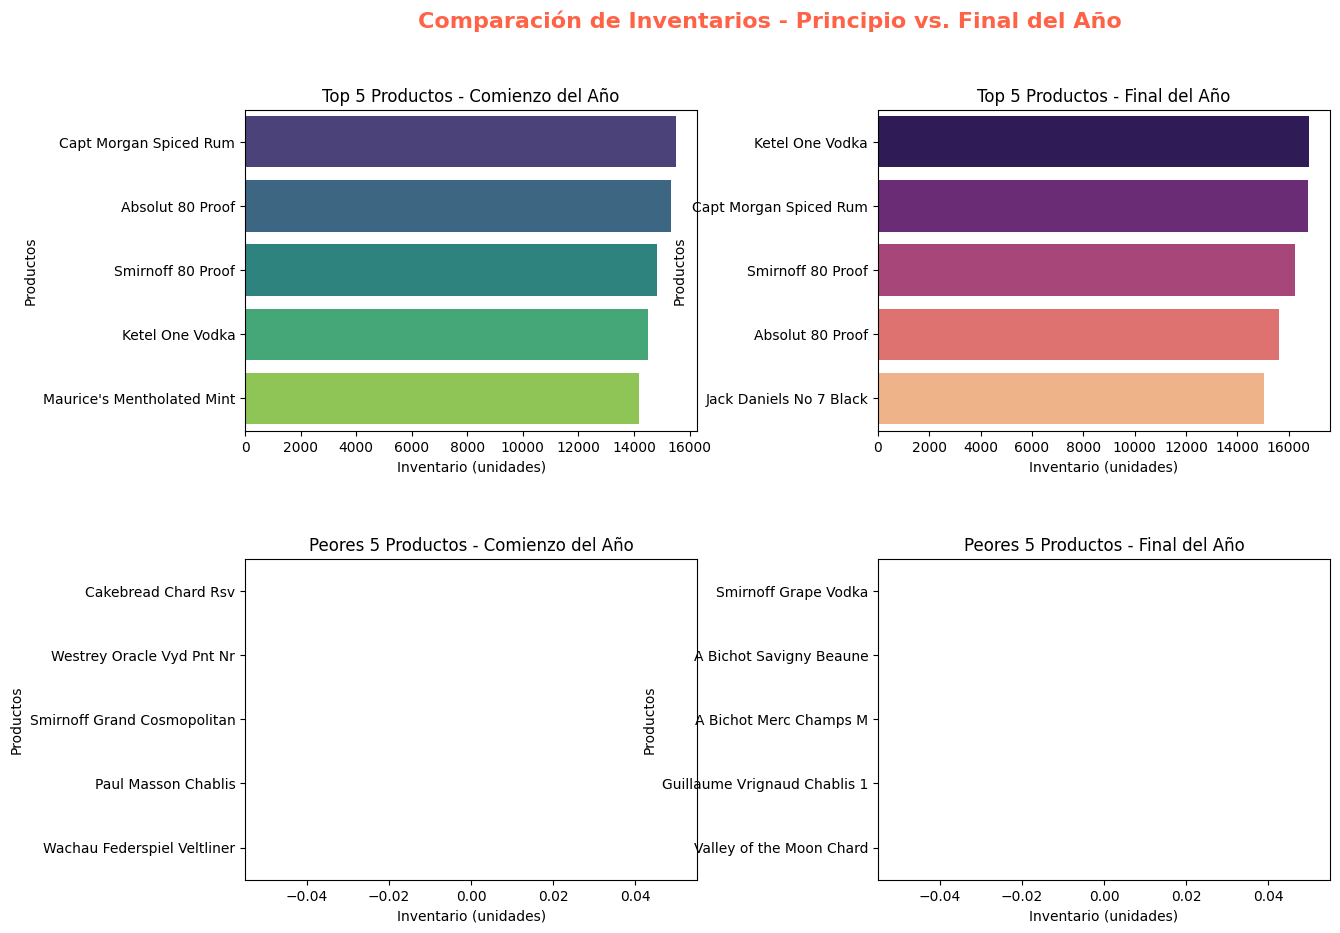

In [10]:
# Validar que los datos existan para cada subconjunto
if not top_5_beg.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})

    # Top 5 productos al comienzo del año
    sns.barplot(ax=axes[0, 0], x=top_5_beg['onHand'], y=top_5_beg['Description'], hue=top_5_beg['Description'], 
                palette="viridis", dodge=False, legend=False)
    axes[0, 0].set_title("Top 5 Productos - Comienzo del Año")
    axes[0, 0].set_xlabel("Inventario (unidades)")
    axes[0, 0].set_ylabel("Productos")

    # Top 5 productos al final del año
    sns.barplot(ax=axes[0, 1], x=top_5_end['onHand'], y=top_5_end['Description'], hue=top_5_end['Description'], 
                palette="magma", dodge=False, legend=False)
    axes[0, 1].set_title("Top 5 Productos - Final del Año")
    axes[0, 1].set_xlabel("Inventario (unidades)")
    axes[0, 1].set_ylabel("Productos")

    # Validar si existen datos para los peores productos al inicio del año
    if not bottom_5_beg.empty:
        sns.barplot(ax=axes[1, 0], x=bottom_5_beg['onHand'], y=bottom_5_beg['Description'], hue=bottom_5_beg['Description'], 
                    palette="cool", dodge=False, legend=False)
        axes[1, 0].set_title("Peores 5 Productos - Comienzo del Año")
        axes[1, 0].set_xlabel("Inventario (unidades)")
        axes[1, 0].set_ylabel("Productos")
    else:
        axes[1, 0].text(0.5, 0.5, "Sin datos", fontsize=14, ha='center', va='center')
        axes[1, 0].set_title("Peores 5 Productos - Comienzo del Año")

    # Validar si existen datos para los peores productos al final del año
    if not bottom_5_end.empty:
        sns.barplot(ax=axes[1, 1], x=bottom_5_end['onHand'], y=bottom_5_end['Description'], hue=bottom_5_end['Description'], 
                    palette="autumn", dodge=False, legend=False)
        axes[1, 1].set_title("Peores 5 Productos - Final del Año")
        axes[1, 1].set_xlabel("Inventario (unidades)")
        axes[1, 1].set_ylabel("Productos")
    else:
        axes[1, 1].text(0.5, 0.5, "Sin datos", fontsize=14, ha='center', va='center')
        axes[1, 1].set_title("Peores 5 Productos - Final del Año")

    # Título global
    plt.suptitle("Comparación de Inventarios - Principio vs. Final del Año", fontsize=16, weight='bold', color='tomato')
    plt.show()
else:
    print("No hay datos suficientes para realizar los gráficos.")

In [11]:
# Encontrar los productos más vendidos
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Encontrar los productos con menor movimiento
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Slow-moving ten products:
                                    SalesQuantity
Brand Description                                
19833 Terra di Montevero Toscana                1
105   Mr Boston Butterscotch                    1
21339 Flowers Sonoma Cst Chard                  1
15835 Ninety+Cellars Lot 33 Rose                1
44278 Scala Dei Negre Priorat                 

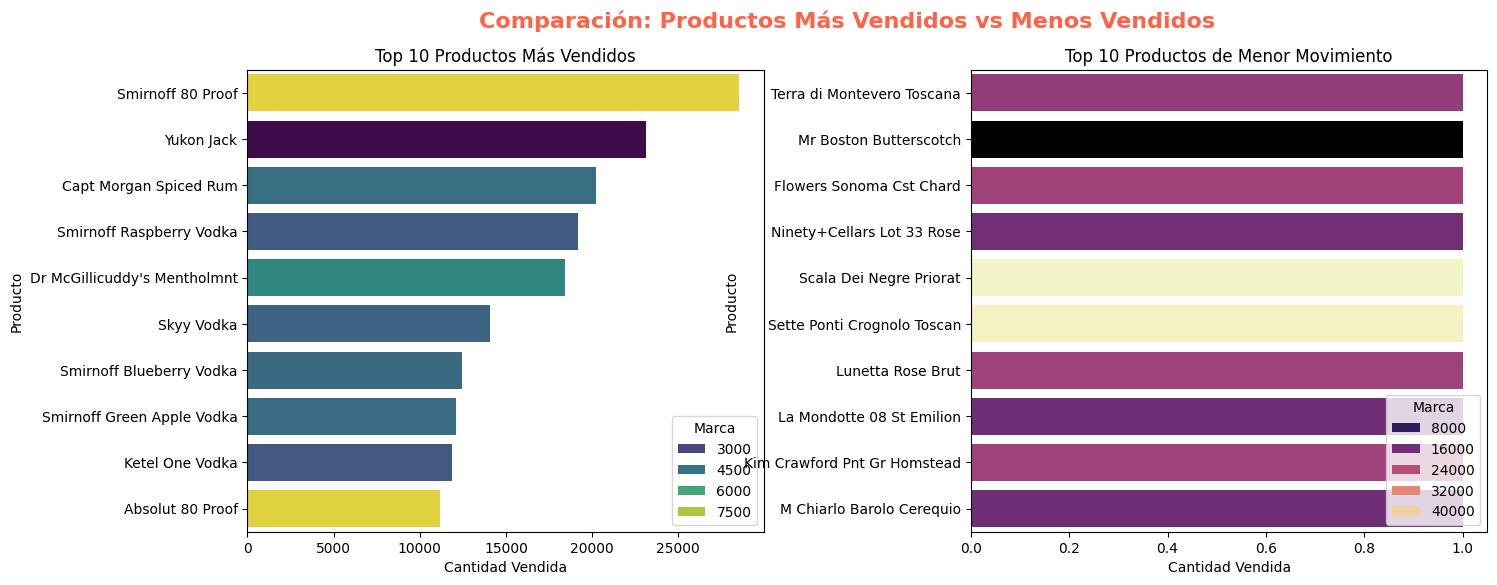

In [12]:
# Graficar los productos más vendidos
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.4})

# Gráfico de los 10 productos más vendidos
sns.barplot(
    ax=axes[0], 
    data=best_selling_products.reset_index(), 
    x='SalesQuantity', 
    y='Description', 
    hue='Brand', 
    dodge=False, 
    palette='viridis'
)
axes[0].set_title("Top 10 Productos Más Vendidos")
axes[0].set_xlabel("Cantidad Vendida")
axes[0].set_ylabel("Producto")
axes[0].legend(title="Marca", loc='lower right')

# Gráfico de los 10 productos de menor movimiento
sns.barplot(
    ax=axes[1], 
    data=slow_moving_products.reset_index(), 
    x='SalesQuantity', 
    y='Description', 
    hue='Brand', 
    dodge=False, 
    palette='magma'
)
axes[1].set_title("Top 10 Productos de Menor Movimiento")
axes[1].set_xlabel("Cantidad Vendida")
axes[1].set_ylabel("Producto")
axes[1].legend(title="Marca", loc='lower right')

# Título general
plt.suptitle("Comparación: Productos Más Vendidos vs Menos Vendidos", fontsize=16, weight='bold', color='tomato')
plt.show()

In [13]:
# Calcular el importe total para beg_inv
beg_inv["ImporteInicial"] = beg_inv["onHand"] * beg_inv["Price"]
importe_total_inicial = beg_inv["ImporteInicial"].sum()

# Calcular el importe total para end_inv
end_inv["ImporteFinal"] = end_inv["onHand"] * end_inv["Price"]
importe_total_final = end_inv["ImporteFinal"].sum()

# Imprimir los resultados
print(f"Importe total del inventario inicial (beg_inv): {importe_total_inicial:.2f}")
print(f"Importe total del inventario final (end_inv): {importe_total_final:.2f}")

# Calcular la diferencia entre el inventario inicial y final
diferencia = importe_total_final - importe_total_inicial
print(f"Diferencia entre inventarios: {diferencia:.2f}")

Importe total del inventario inicial (beg_inv): 68053780.17
Importe total del inventario final (end_inv): 79704851.13
Diferencia entre inventarios: 11651070.96


In [14]:
# Productos más comprados (con coste total)
best_purchased_products = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'  # Suponiendo que esta columna contiene el coste total de las compras
}).sort_values(by='Quantity', ascending=False).head(10)

print(f"Los diez productos más comprados (con costo total):\n{best_purchased_products}\n")

# Productos de compra lenta (con coste total)
slow_moving_purchases = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'
}).sort_values(by='Quantity', ascending=True).head(120)

print(f"Los 100 productos más comprados con menor movimiento (con costo total):\n{slow_moving_purchases}")

Los diez productos más comprados (con costo total):
                                    Quantity     Dollars
Brand Description                                       
8111  Smirnoff 80 Proof               337660   259998.20
1892  Yukon Jack                      254824   183473.28
5111  Dr McGillicuddy's Mentholmnt    244654   176150.88
3606  Smirnoff Raspberry Vodka        226085   167302.90
6570  Kendall Jackson Chard Vt RSV    215668  1460072.36
4261  Capt Morgan Spiced Rum          201682  3261197.94
8068  Absolut 80 Proof                187407  3418303.68
3405  Tito's Handmade Vodka           164038  3804041.22
3837  Skyy Vodka                      163375   117630.00
3102  Smirnoff Traveler               161386  2088334.84

Los 100 productos más comprados con menor movimiento (con costo total):
                                   Quantity  Dollars
Brand Description                                   
23747 Ch Cantemerie 12 Haut-Medoc         1    27.88
21691 Tracia Syrah              

In [16]:
# Productos con una cantidad total de compra exactamente uno

# Agrupar datos para calcular cantidades y costes
low_movement_products = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'
}).sort_values(by='Quantity', ascending=True)

# Filtrar los productos cuya cantidad total comprada es exactamente uno
products_quantity_one = low_movement_products[low_movement_products['Quantity'] == 1]

# Exportar a un archivo Excel
output_file = "low_movement_products_quantity_one.xlsx"
products_quantity_one.to_excel(output_file, index=True)

print(f"Los productos con una cantidad de compra de exactamente uno se han exportado a:'{output_file}'")

Los productos con una cantidad de compra de exactamente uno se han exportado a:'low_movement_products_quantity_one.xlsx'


In [17]:
# Agrupar datos para calcular cantidades y costes
low_movement_products = purchases.groupby(['Brand', 'Description']).agg({
    'Quantity': 'sum',
    'Dollars': 'sum'
}).sort_values(by='Quantity', ascending=True)

# Filtrar los productos cuya cantidad total comprada es exactamente uno
products_quantity_one = low_movement_products[low_movement_products['Quantity'] == 1]

# Contar cuántos productos cumplen la condición
total_products = products_quantity_one.shape[0]

# Calcular el importe total de estos productos
total_amount = products_quantity_one['Dollars'].sum()

# Mostrar los resultados
print(f"Número total de productos con una cantidad de compra de exactamente uno: {total_products}")
print(f"Importe total asociado a estos productos: ${total_amount:.2f}")

Número total de productos con una cantidad de compra de exactamente uno: 181
Importe total asociado a estos productos: $14039.04


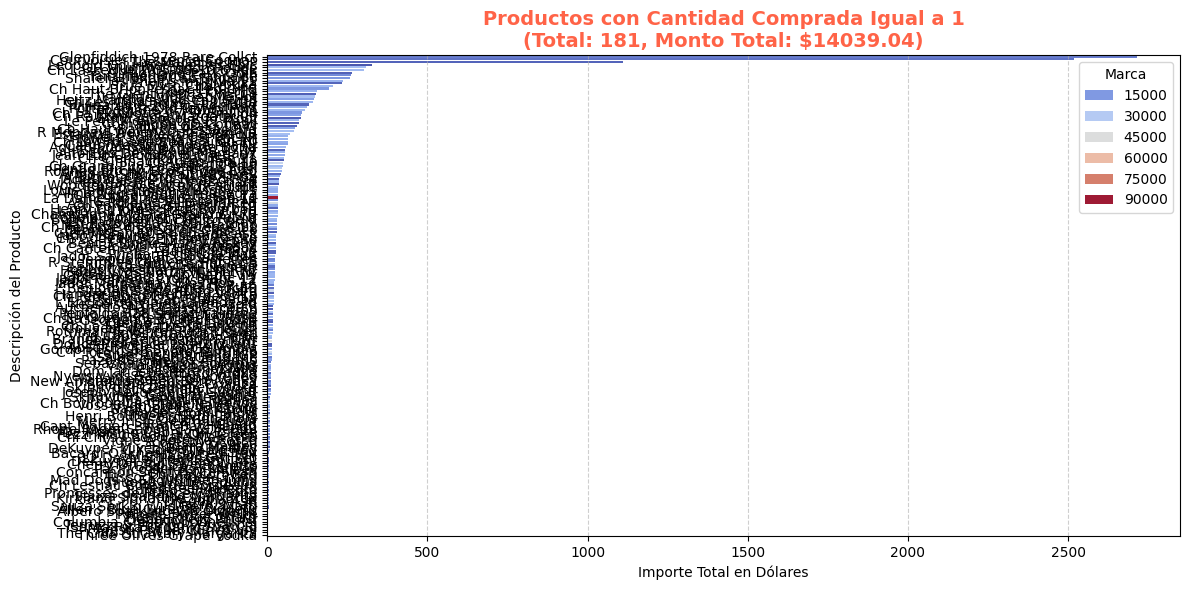

In [18]:
# Preparar datos para graficar
products_quantity_one = products_quantity_one.reset_index()  # Restablecer índice para facilitar el acceso
products_quantity_one = products_quantity_one.sort_values(by='Dollars', ascending=False)  # Ordenar por coste

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=products_quantity_one, 
    x='Dollars', 
    y='Description', 
    hue='Brand', 
    dodge=False, 
    palette='coolwarm'
)

# Etiquetas y título
plt.title(f"Productos con Cantidad Comprada Igual a 1\n(Total: {total_products}, Monto Total: ${total_amount:.2f})", fontsize=14, weight='bold', color='tomato')
plt.xlabel("Importe Total en Dólares")
plt.ylabel("Descripción del Producto")
plt.legend(title="Marca", loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [19]:
# Asegúrate de que la columna de fecha está en formato datetime
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Crear una nueva columna con el mes y año
purchases['YearMonth'] = purchases['ReceivingDate'].dt.to_period('M')

# Agrupar por mes y calcular el total de compras
monthly_purchases = purchases.groupby('YearMonth').agg({
    'Quantity': 'sum',
    'Dollars': 'sum'  # Supongamos que 'Dollars' representa el coste total de la compra
}).sort_index()

# Mostrar resultados
print("Total purchases by month:")
print(monthly_purchases)

# Exportar a un archivo Excel
output_file = "monthly_purchases_summary.xlsx"
monthly_purchases.to_excel(output_file, index=True)

print(f"El resumen de compras mensual se ha exportado a: '{output_file}'")

Total purchases by month:
           Quantity      Dollars
YearMonth                       
2016-01     2232313  20514449.18
2016-02     2182428  19833840.75
2016-03     2319276  20983950.16
2016-04     2218612  20886046.39
2016-05     2778905  26439770.66
2016-06     3025276  29120996.18
2016-07     3322511  33408202.53
2016-08     3328118  31454989.01
2016-09     2953690  27521421.07
2016-10     2788824  27720973.77
2016-11     3051058  31565630.22
2016-12     3383352  32450313.69
El resumen de compras mensual se ha exportado a: 'monthly_purchases_summary.xlsx'


In [20]:
# Convertir columnas de fecha a datetime
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'], errors='coerce')

# Verificar si alguna conversión falló
if purchases['ReceivingDate'].isna().any():
    print("Hay valores nulos o no convertibles en 'ReceivingDate'. Verifica los datos.")
if sales['SalesDate'].isna().any():
    print("Hay valores nulos o no convertibles en 'SalesDate'. Verifica los datos.")

# Crear una columna con el mes y año en ambas tablas
purchases['YearMonth'] = purchases['ReceivingDate'].dt.to_period('M')
sales['YearMonth'] = sales['SalesDate'].dt.to_period('M')

# Agrupar por mes y calcular el total de compras y ventas
monthly_purchases = purchases.groupby('YearMonth').agg({
    'Dollars': 'sum'  # Supongamos que 'Dollars' representa el coste total de las compras
}).rename(columns={'Dollars': 'TotalPurchases'})

monthly_sales = sales.groupby('YearMonth').agg({
    'SalesDollars': 'sum'  # Supongamos que 'SalesDollars' representa el ingreso total de las ventas
}).rename(columns={'SalesDollars': 'TotalSales'})

# Encontrar el primer mes común en ambas tablas
first_month = min(monthly_purchases.index.min(), monthly_sales.index.min())

# Obtener los valores del primer mes
purchases_first_month = monthly_purchases.loc[first_month, 'TotalPurchases'] if first_month in monthly_purchases.index else 0
sales_first_month = monthly_sales.loc[first_month, 'TotalSales'] if first_month in monthly_sales.index else 0

# Calcular la diferencia y el porcentaje
difference = sales_first_month - purchases_first_month
percentage_difference = (difference / purchases_first_month * 100) if purchases_first_month > 0 else None

# Mostrar resultados
print(f"Primer mes: {first_month}")
print(f"Compras totales en el primer mes: ${purchases_first_month:.2f}")
print(f"Ventas totales en el primer mes: ${sales_first_month:.2f}")
print(f"Diferencia (Ventas - Compras): ${difference:.2f}")
if percentage_difference is not None:
    print(f"Diferencia en porcentaje: {percentage_difference:.2f}%")
else:
    print("Diferencia en porcentaje: N/A (Las compras son cero o no están definidas)")

Primer mes: 2016-01
Compras totales en el primer mes: $20514449.18
Ventas totales en el primer mes: $29854027.92
Diferencia (Ventas - Compras): $9339578.74
Diferencia en porcentaje: 45.53%


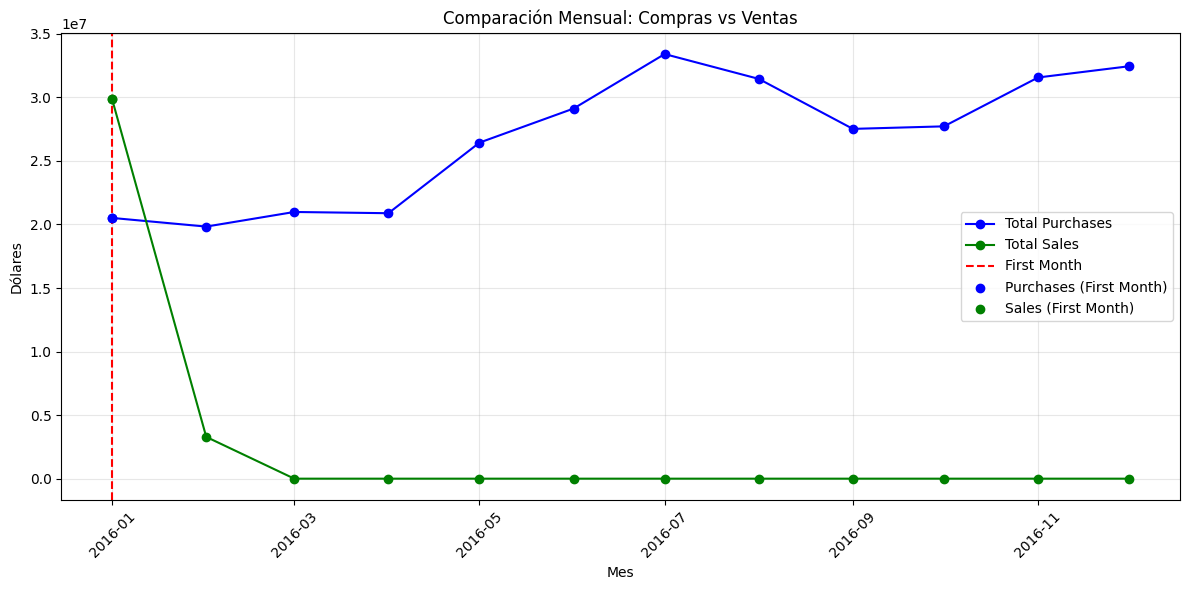

In [21]:

# Asegurarse de que ambos DataFrames tengan un índice datetime
monthly_purchases.index = monthly_purchases.index.to_timestamp()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Fusionar las tablas para facilitar el graficado
combined_data = monthly_purchases.join(monthly_sales, how='outer').fillna(0)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['TotalPurchases'], label='Total Purchases', marker='o', color='blue')
plt.plot(combined_data.index, combined_data['TotalSales'], label='Total Sales', marker='o', color='green')

# Resaltar el primer mes
if first_month:
    first_month_date = first_month.to_timestamp()
    plt.axvline(x=first_month_date, color='red', linestyle='--', label='First Month')
    plt.scatter(first_month_date, purchases_first_month, color='blue', zorder=5, label='Purchases (First Month)')
    plt.scatter(first_month_date, sales_first_month, color='green', zorder=5, label='Sales (First Month)')

# Personalizar el gráfico
plt.title('Comparación Mensual: Compras vs Ventas')
plt.xlabel('Mes')
plt.ylabel('Dólares')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
# El gráfico muestra que las compras son mayores que las ventas durante varios meses consecutivos, esto podría significar que:

# - Se está adquiriendo más inventario del necesario.
# - Podría haber un problema de rotación de inventarios, lo que conllevaría a costos de almacenamiento elevados.


# Si las ventas son mayores que las compras en la mayoría de los meses:

# - Esto podría ser positivo, mostrando una buena utilización del inventario, 
# pero es importante monitorear para evitar quedarse sin existencias.

In [23]:
# Calcular el margen
margin = 0.45

# Agrupar las compras por mes y calcular el total
annual_purchases = purchases.groupby('YearMonth').agg({
    'Dollars': 'sum'  # Supongamos que 'Dollars' representa el coste total de las compras
}).rename(columns={'Dollars': 'TotalPurchases'})

# Calcular las ventas estimadas para todo el año con el margen aplicado
annual_purchases['EstimatedSales'] = annual_purchases['TotalPurchases'] * (1 + margin)

# Calcular el total anual de compras y ventas estimadas
total_purchases = annual_purchases['TotalPurchases'].sum()
total_estimated_sales = annual_purchases['EstimatedSales'].sum()

# Mostrar los resultados
print(f"Compras totales del año: ${total_purchases:.2f}")
print(f"Ventas totales estimadas para el año (margen del 45%): ${total_estimated_sales:.2f}")

# Mostrar el desglose mensual (opcional)
print("\nDesglose mensual::")
print(annual_purchases)


Compras totales del año: $321900583.61
Ventas totales estimadas para el año (margen del 45%): $466755846.23

Desglose mensual::
           TotalPurchases  EstimatedSales
YearMonth                                
2016-01       20514449.18    2.974595e+07
2016-02       19833840.75    2.875907e+07
2016-03       20983950.16    3.042673e+07
2016-04       20886046.39    3.028477e+07
2016-05       26439770.66    3.833767e+07
2016-06       29120996.18    4.222544e+07
2016-07       33408202.53    4.844189e+07
2016-08       31454989.01    4.560973e+07
2016-09       27521421.07    3.990606e+07
2016-10       27720973.77    4.019541e+07
2016-11       31565630.22    4.577016e+07
2016-12       32450313.69    4.705295e+07


In [24]:
# Calcular la diferencia entre las ventas estimadas y las compras totales
difference = total_estimated_sales - total_purchases

# Calcular el porcentaje de diferencia
percentage_difference = (difference / total_purchases) * 100 if total_purchases > 0 else None

# Mostrar los resultados
print(f"Compras totales del año: ${total_purchases:.2f}")
print(f"Ventas totales estimadas para el año (margen del 45%): ${total_estimated_sales:.2f}")
print(f"Diferencia (Ventas - Compras): ${difference:.2f}")
if percentage_difference is not None:
    print(f"Diferencia en porcentaje: {percentage_difference:.2f}%")
else:
    print("Diferencia en porcentaje: N/A (Las compras son cero o no están definidas)")

Compras totales del año: $321900583.61
Ventas totales estimadas para el año (margen del 45%): $466755846.23
Diferencia (Ventas - Compras): $144855262.62
Diferencia en porcentaje: 45.00%


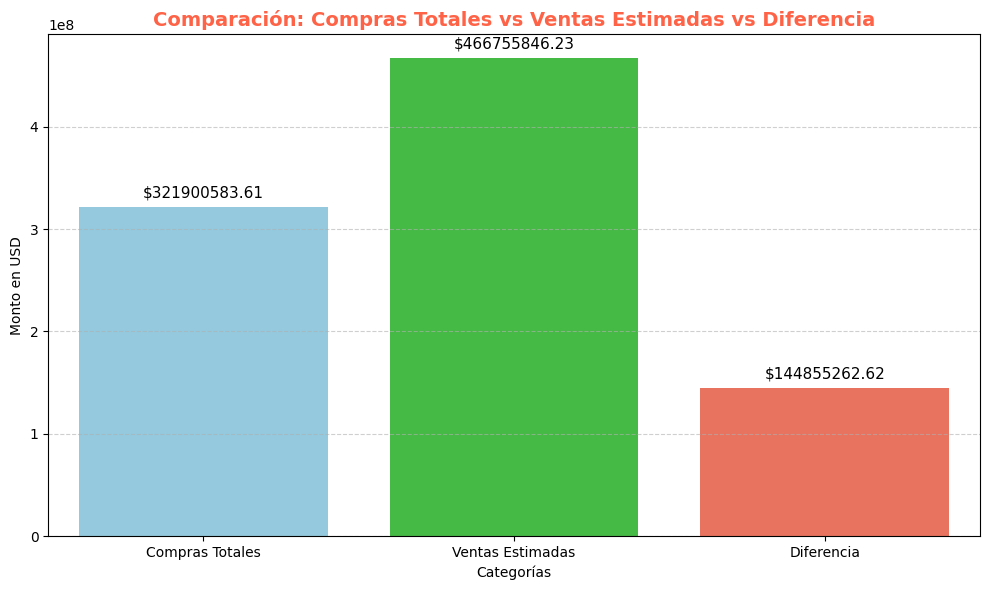

In [25]:
# Crear un DataFrame para las métricas clave
data = {
    'Categoría': ['Compras Totales', 'Ventas Estimadas', 'Diferencia'],
    'Monto': [total_purchases, total_estimated_sales, difference]
}
metrics_df = pd.DataFrame(data)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=metrics_df, 
    x='Categoría', 
    y='Monto', 
    hue='Categoría',  # Usamos 'Categoría' como variable para el color
    dodge=False, 
    palette=['skyblue', 'limegreen', 'tomato'],
    legend=False  # Evitamos agregar una leyenda extra
)

# Etiquetas y personalización
plt.title("Comparación: Compras Totales vs Ventas Estimadas vs Diferencia", fontsize=14, weight='bold', color='tomato')
plt.ylabel("Monto en USD")
plt.xlabel("Categorías")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Agregar valores sobre las barras
for i, value in enumerate(metrics_df['Monto']):
    plt.text(i, value + (max(metrics_df['Monto']) * 0.02), f"${value:.2f}", ha='center', fontsize=11)

# Mostrar el gráfico
plt.tight_layout()
plt.show()